<a href="https://colab.research.google.com/github/yunseo4401/start/blob/master/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A6%AC%EB%B7%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google_play_scraper import Sort,reviews_all
raw_data=reviews_all('com.dxx.firenow',
lang='en',
country='Us',
sort=Sort.MOST_RELEVANT, 
)
from pprint import pprint
pprint(raw_data[:5])

[{'at': datetime.datetime(2022, 10, 4, 0, 40, 2),
  'content': 'Fun game, but lots of repetition and click rewards... I paid to '
             "have ads removed so my experience may be different. So far it's "
             'been a fun game, at least day 7 in a row for me. Logging in and '
             'spending 15 minutes absolutely wailing on zombies is a lot of '
             "fun. I like trying new builds and items as they're unlocked. It "
             "can be a challenge if you don't get the items you are used to "
             'running.',
  'repliedAt': None,
  'replyContent': None,
  'reviewCreatedVersion': '1.5.3',
  'reviewId': 'bd4a46ef-c19f-424e-a95e-64001193c9e0',
  'score': 4,
  'thumbsUpCount': 217,
  'userImage': 'https://play-lh.googleusercontent.com/a/ALm5wu3HODE6oyQXku7YXZv5vTXZYuXbFvWszwea3C4=mo',
  'userName': 'joshua mckay'},
 {'at': datetime.datetime(2022, 9, 29, 1, 49, 21),
  'content': 'Great game, I really enjoy it and it is a great time killer. I '
           

In [ ]:
import csv
data_li=[(info['content'],info['score'],info['thumbsUpCount'],info['at']) for info in raw_data]

In [ ]:
with open("/content/drive/MyDrive/Untitled0.csv", 'wt', encoding='utf-8', newline='') as file:
        csv_writer = csv.writer(file)
        csv_writer.writerow(["contents", "star", "agree", "date"])

        for data in data_li:
            csv_writer.writerow(data)

In [ ]:
import pandas as pd

review_df = pd.read_csv("/content/drive/MyDrive/Untitled0.csv")
review_df

,contents,star,agree,date
0,"Fun game, but lots of repetition and click rew...",4,217,2022-10-04 00:40:02
1,"Great game, I really enjoy it and it is a grea...",4,344,2022-09-29 01:49:21
2,Super addicted and I'm not even sure why. The ...,5,103,2022-10-07 23:55:56
3,Fun game. I do have an issue with the game cra...,4,1,2022-10-08 02:08:48
4,"I am addicted, the gameplay is super fun and e...",5,128,2022-10-02 05:55:03
...,...,...,...,...
26013,Wow,4,0,2022-10-12 15:18:34
26014,Grind game,3,0,2022-10-12 10:00:02
26015,🥰🥰🥰🥰🥰🥰,5,0,2022-10-10 15:15:47
26016,🥶🥶🥶🥶🥶🥶🥶🥶🥶🥶🥶🥶🥶🥶🥶,5,0,2022-10-02 09:02:48


In [ ]:
data_df=pd.read_csv("/content/drive/MyDrive/Untitled0.csv")
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26018 entries, 0 to 26017
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   contents  26018 non-null  object
 1   star      26018 non-null  int64 
 2   agree     26018 non-null  int64 
 3   date      26018 non-null  object
dtypes: int64(2), object(2)
memory usage: 813.2+ KB


In [ ]:
!pip install spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import os
import json
import sklearn
from sklearn.model_selection import train_test_split

data_df.head()



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,contents,star,agree,date
0,"Fun game, but lots of repetition and click rew...",4,217,2022-10-04 00:40:02
1,"Great game, I really enjoy it and it is a grea...",4,344,2022-09-29 01:49:21
2,Super addicted and I'm not even sure why. The ...,5,103,2022-10-07 23:55:56
3,Fun game. I do have an issue with the game cra...,4,1,2022-10-08 02:08:48
4,"I am addicted, the gameplay is super fun and e...",5,128,2022-10-02 05:55:03


In [ ]:
data_df.head()

,contents,star,agree,date
0,"Fun game, but lots of repetition and click rew...",4,217,2022-10-04 00:40:02
1,"Great game, I really enjoy it and it is a grea...",4,344,2022-09-29 01:49:21
2,Super addicted and I'm not even sure why. The ...,5,103,2022-10-07 23:55:56
3,Fun game. I do have an issue with the game cra...,4,1,2022-10-08 02:08:48
4,"I am addicted, the gameplay is super fun and e...",5,128,2022-10-02 05:55:03


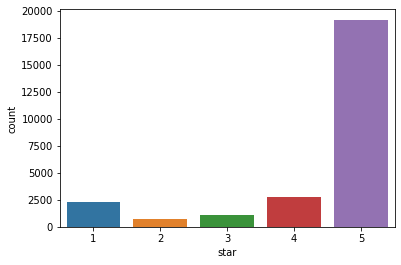

In [ ]:
sns.countplot(x='star',data=data_df)

In [ ]:
#별점을 통해서 레이블링 작업수행 
df_except_neut = data_df['star'] != 3
data_df = data_df[df_except_neut]

# 레이블링 할당 (긍정 : 1, 부정 : 0)
data_df['sentiment'] = [1 if i > 3 else 0 for i in data_df['star']]

# nan 값 제거
data_df = data_df.dropna()

# 중복 제거
data_df = data_df.drop_duplicates()

data_df.reset_index(drop=True, inplace=True)

data_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,contents,star,agree,date,sentiment
0,"Fun game, but lots of repetition and click rew...",4,217,2022-10-04 00:40:02,1
1,"Great game, I really enjoy it and it is a grea...",4,344,2022-09-29 01:49:21,1
2,Super addicted and I'm not even sure why. The ...,5,103,2022-10-07 23:55:56,1
3,Fun game. I do have an issue with the game cra...,4,1,2022-10-08 02:08:48,1
4,"I am addicted, the gameplay is super fun and e...",5,128,2022-10-02 05:55:03,1
...,...,...,...,...,...
24915,👍,5,0,2022-10-12 15:17:52,1
24916,Wow,4,0,2022-10-12 15:18:34,1
24917,🥰🥰🥰🥰🥰🥰,5,0,2022-10-10 15:15:47,1
24918,🥶🥶🥶🥶🥶🥶🥶🥶🥶🥶🥶🥶🥶🥶🥶,5,0,2022-10-02 09:02:48,1


긍정 개수: 21909
부정 개수: 3011


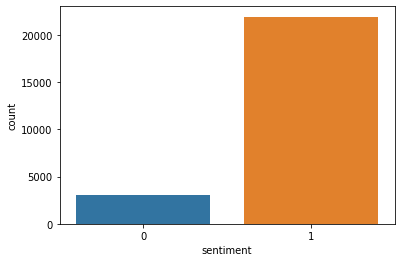

In [ ]:
import seaborn as sns

sns.countplot(x='sentiment', data=data_df)
print("긍정 개수:", (data_df["sentiment"] == 1).sum())
print("부정 개수:", (data_df["sentiment"] == 0).sum()) 

In [ ]:
def equal_ratio(df): #downsampling
    # 레이블링 확인
    pos = df['sentiment'] == 1
    neg = df['sentiment'] == 0

    # pos와 neg 구분
    pos = df[pos]
    neg = df[neg]

    # 이전 개수 출력
    print(len(pos),"before pos")
    print(len(neg),"before neg")

    # 비율 맞춤
    pos_len = len(pos)
    neg_len = len(neg)
    max_len = max(pos_len, neg_len)

    DFF = abs(pos_len - neg_len)
    ratio = 1 - (DFF / max_len)
    
    if pos_len == neg_len:
      pass
    elif pos_len > neg_len:
        pos = pos.sample(frac=ratio, random_state=82)
    else:
        neg = neg.sample(frac=ratio, random_state=82)

    # 이후 개수 출력
    print(len(pos),"after pos")
    print(len(neg),"after neg")

    df = pd.concat([pos, neg], axis=0)
    df = sklearn.utils.shuffle(df, random_state=82).reset_index(drop=True)
    
    return df

21909 before pos
3011 before neg
3011 after pos
3011 after neg


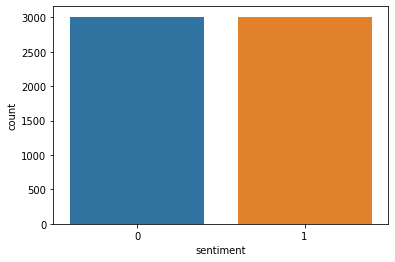

In [ ]:
data_df = equal_ratio(data_df)
sns.countplot(x='sentiment', data=data_df)

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
def preprocessing(review):
    #re
    review = re.sub("[^a-zA-Z]", " ", review)
    word_li = review.lower().split()
    sentence = ' '.join(word_li)
    
    # lemmatization (spacy)
    token_li = nlp(sentence)
    word_li = [token.lemma_ for token in token_li if not token.is_stop]

    # 문자열로 변환 (띄어쓰기 한 칸 기준으로)
    sentence = ' '.join(word_li)    
    
    return sentence

In [ ]:
from tqdm import tqdm
tqdm.pandas()
data_df["prepro"] = data_df["contents"].progress_apply(preprocessing)  

100%|██████████| 6022/6022 [00:58<00:00, 103.43it/s]


In [ ]:
print("공백 제거 전 데이터 개수: ", len(data_df))

not_empty_value = data_df["prepro"] != ""
data_df = data_df[not_empty_value]
print("공백 제거 후 데이터 개수: ", len(data_df))

공백 제거 전 데이터 개수:  6022
공백 제거 후 데이터 개수:  5969


In [ ]:
x_feature = data_df["prepro"].copy()
y_label = data_df["sentiment"].copy()
pprint(x_feature)

0                            great game u t level offline
1                           addict fun good not ad second
2                                 free force add fun play
3                                  love good offline game
4                                            entertaining
                              ...                        
6017                                good lot time consume
6018    stage nice fun easy suddenly stage super hard ...
6019           excellent far ad optional good progression
6020        not play game m touch happen maybe game break
6021        give star s way enemy screen make lag fix lag
Name: prepro, Length: 5969, dtype: object


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_feature, y_label, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer=CountVectorizer(analyzer='word',max_features=3000)
x_bow_train=bow_vectorizer.fit_transform(x_train)

y_train=np.array(y_train)
x_bow_test=bow_vectorizer.transform(x_test)
y_test=np.array(y_test)

<4775x3000 sparse matrix of type '<class 'numpy.int64'>'
	with 36278 stored elements in Compressed Sparse Row format>


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
mod=MultinomialNB()
mod.fit(x_bow_train,y_train)


hyper_parmas = {"alpha": [1,2,3]}

grid_mod_bow_model = GridSearchCV(mod, param_grid=hyper_parmas, cv=5, refit=True, return_train_score=True)
grid_mod_bow_model.fit(x_bow_train, y_train)

from sklearn.metrics import accuracy_score
y_pred=mod.predict(x_bow_test)
accuracy_score(y_test,y_pred)

0.8894472361809045

In [ ]:
result_di = {
    "test_contents": x_bow_test,
    "sentiment": y_test,
    "bow": y_pred}
    
result_df = pd.DataFrame(result_di)
result_df.to_csv("./sentiment classification.csv")